## Descriptive Statistics

#### Run descriptive statistics to data, identify the entities and relations and draw its diagram. Also group data by entities and obtain statistics from grouped data.

In [17]:
import pandas as pd
import ace_tools_open as tools
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("dataset_limpio.csv")

In [13]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [14]:
desc_stats = df.describe()

desc_stats

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16540.000000,16540.000000,16540.000000,16540.000000,16540.000000,16540.000000,16540.000000
mean,8294.197642,2006.405561,0.265079,0.146883,0.077998,0.048191,0.538426
std,4790.703200,5.788341,0.817929,0.506129,0.309800,0.188879,1.557424
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4143.750000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12440.250000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [15]:
tendencia_central = {
    "Media": df.mean(numeric_only=True),
    "Mediana": df.median(numeric_only=True),
    "Moda": df.mode().iloc[0]
}

dispersion = {
    "Varianza": df.var(numeric_only=True),
    "Desviación Estándar": df.std(numeric_only=True),
    "Rango Intercuartílico (IQR)": df.quantile(0.75, numeric_only=True) - df.quantile(0.25, numeric_only=True)
}

tools.display_dataframe_to_user(name="Medidas de Tendencia Central", dataframe=pd.DataFrame(tendencia_central))
tools.display_dataframe_to_user(name="Medidas de Dispersión", dataframe=pd.DataFrame(dispersion))

Medidas de Tendencia Central


Medidas de Dispersión


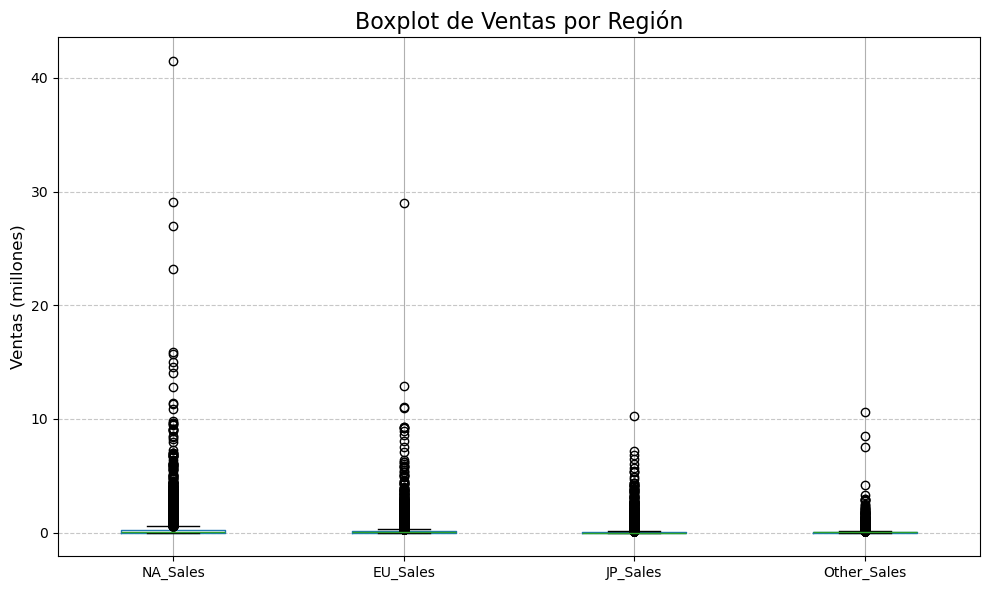

In [18]:
plt.figure(figsize=(10, 6))
df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].boxplot()
plt.title('Boxplot de Ventas por Región', fontsize=16)
plt.ylabel('Ventas (millones)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

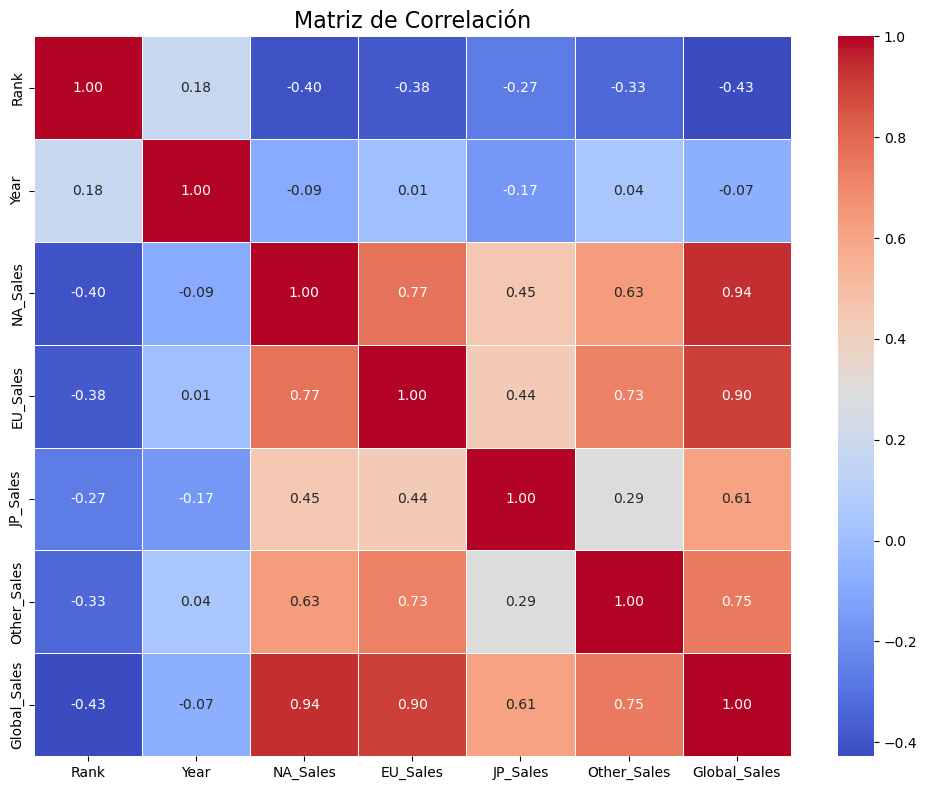

In [19]:
matriz_correlacion = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación', fontsize=16)
plt.tight_layout()
plt.show()